In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'serif'})
pi = np.pi
e = np.e

In [61]:
# #Output
# outputfile = ./

# #Evolution
# expansion = true
# evolver = VV2

# #Lattice
# N = 30
# dt = 0.01
# kIR = 4

# #Times
# tOutputFreq = 0.1
# tOutputInfreq = 1
# tMax = 300


# #Spectra options
# PS_type = 1
# PS_version = 1

# #GWs
# GWprojectorType = 1
# withGWs = false

# #IC
# initial_amplitudes = 5.6964e18 # homogeneous amplitudes in GeV
# initial_momenta = -4.86735e30 # homogeneous amplitudes in GeV2
# seed = 1234

# #Model Parameters
# gamma = 9e-14 
# lambda = 1e-20
# sigma = 5e-10
# phi0 = 5.6964e18



# Cargar datos

In [62]:
path = '../build_phiexp/'

# Load data
energies = pd.read_csv(path + 'average_energies.txt', sep='    ', header=None, engine='python')
energies.columns = ['eta','K','G', 'V', 'rho']

energy_cons = pd.read_csv(path + 'average_energy_conservation.txt', sep='    ', header=None, engine='python')
energy_cons.columns = ['eta','deltaE','lhs','rhs']

scalar0 = pd.read_csv(path + 'average_scalar_0.txt', sep='    ', header=None, engine='python')
scalar0.columns = ['eta','phi','phi_prime', 'phi2', 'phi_prime2', 'rms_phi', 'rms_phi_prime']

scale_factor = pd.read_csv(path + 'average_scale_factor.txt', sep='    ', header=None, engine='python')
scale_factor.columns = ['eta','a','a_prime', 'H']

# spectra_scalar0 = pd.read_csv(path + 'spectra_scalar_0.txt', sep=' ', header=None, engine='python')
# spectra_scalar0.columns = ['k','S_phi','S_phi_prime','n_k']

# Plottear 

## Energías

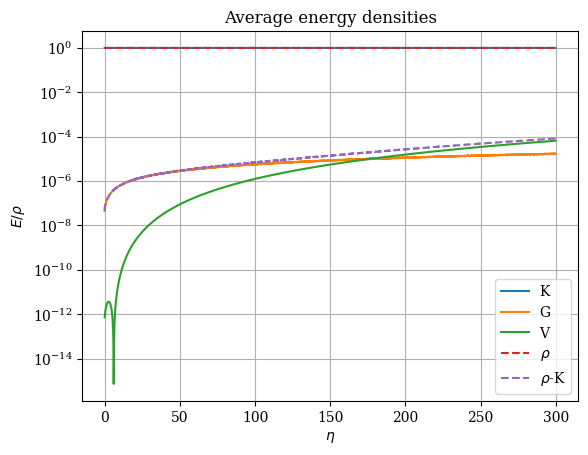

In [63]:
plt.plot(energies['eta'], energies['K']/energies['rho'], label='K')
plt.plot(energies['eta'], energies['G']/energies['rho'], label='G')
plt.plot(energies['eta'], energies['V']/energies['rho'], label='V')
plt.plot(energies['eta'], energies['rho']/energies['rho'],'--', label=r'$\rho$')
plt.plot(energies['eta'], (energies['rho']-energies['K'])/energies['rho'], '--', label=r'$\rho$-K')

plt.title('Average energy densities')
plt.ylabel(r'$E/\rho$')
plt.xlabel(r'$\eta$')

plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

## Conservación

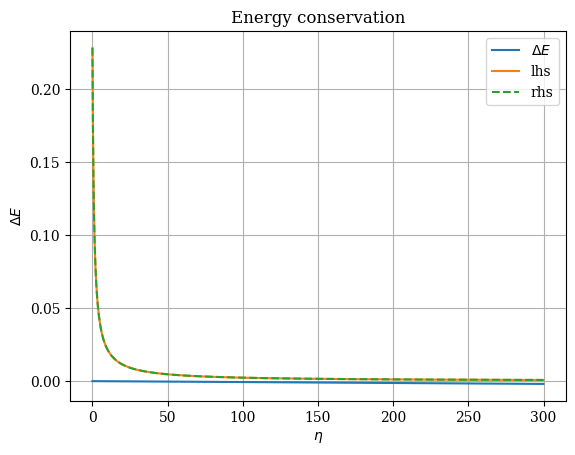

In [64]:
plt.plot(energy_cons['eta'], energy_cons['deltaE'], label=r'$\Delta E$')
plt.plot(energy_cons['eta'], energy_cons['lhs'], label='lhs')
plt.plot(energy_cons['eta'], energy_cons['rhs'], '--', label='rhs')

plt.title('Energy conservation')
plt.ylabel(r'$\Delta E$')
plt.xlabel(r'$\eta$')
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

## Promedio del campo

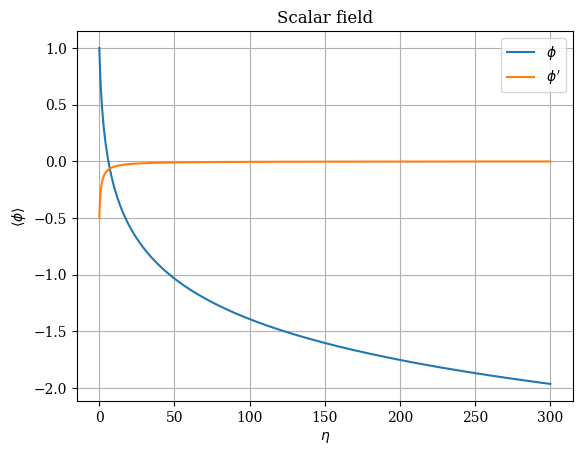

In [65]:
plt.plot(scalar0['eta'], scalar0['phi'], label=r'$\phi$')
plt.plot(scalar0['eta'], scalar0['phi_prime'], label=r'$\phi^\prime$')


plt.title('Scalar field')
plt.ylabel(r'$\langle\phi\rangle$')
plt.xlabel(r'$\eta$')

plt.legend()
plt.grid()
plt.show()

# plt.plot(scalar0['eta'], scalar0['phi2'], label=r'$\phi^2$')
# plt.plot(scalar0['eta'], scalar0['phi_prime2'], label=r'$\phi^{\prime 2}$')

# plt.title('Scalar field squared')
# plt.ylabel(r'$\phi\prime$')
# plt.xlabel(r'$\eta$')

# plt.legend()
# plt.grid()
# plt.show()

# plt.yscale('log')


## Factor de escala

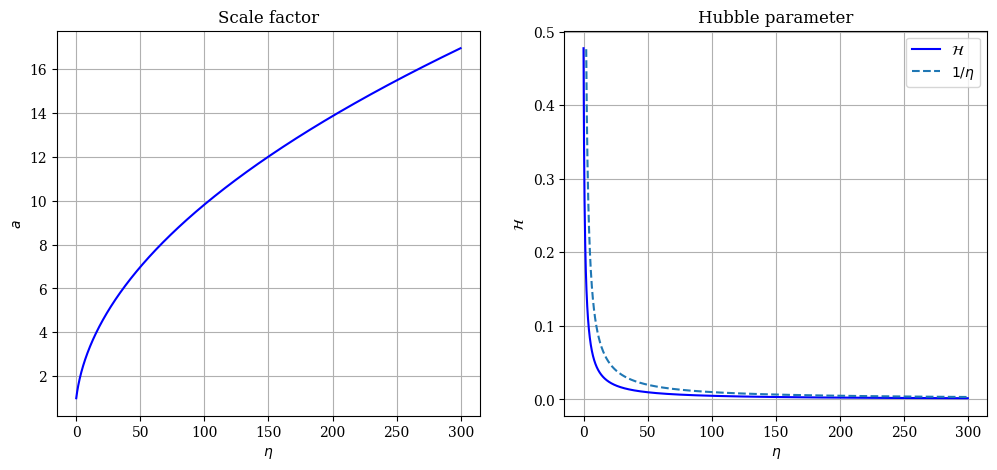

In [66]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(scale_factor['eta'], scale_factor['a'], label=r'$a(\eta)$', color='blue')

plt.title('Scale factor')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$a$')

plt.grid()


plt.subplot(1,2,2)
plt.plot(scale_factor['eta'], scale_factor['H'], label=r'$\mathcal{H}$', color='blue')
plt.plot(scale_factor['eta'][21::], 1/scale_factor['eta'][21::], '--', label=r'$1/\eta$')

plt.title('Hubble parameter')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\mathcal{H}$')

plt.legend()
plt.grid()

## Espectro

In [67]:
file = np.loadtxt(path+'spectra_scalar_0.txt')
step = 25
tmax = 300
data = np.zeros((tmax,step,2))
for i in range(tmax):
    data[i,::,0] = file[step*i:step*(i+1),0]
    data[i,::,1] = file[step*i:step*(i+1),1]
# data[0]

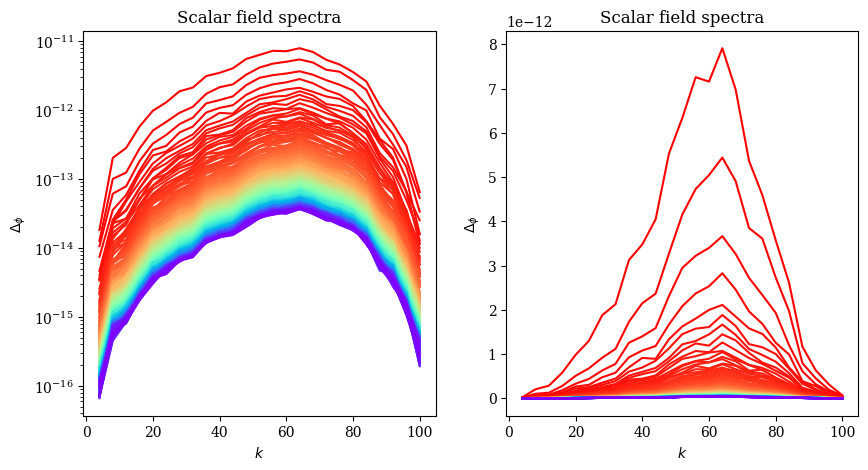

In [71]:
# Crear un colormap arcoíris
cmap = plt.get_cmap('rainbow')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# Graficar cada línea con un color diferente
for i in range(300):
    color = cmap((300-i) / 300)  # Obtener un color del colormap
    plt.plot(data[i, :, 0], data[i, :, 1], color=color)

plt.title('Scalar field spectra')
plt.ylabel(r'$\Delta_\phi$')
plt.xlabel(r'$k$')

plt.yscale('log')

plt.subplot(1, 2, 2)
for i in range(300):
    color = cmap((300-i) / 300)  # Obtener un color del colormap
    plt.plot(data[i, :, 0], data[i, :, 1], color=color)

plt.title('Scalar field spectra')
plt.ylabel(r'$\Delta_\phi$')
plt.xlabel(r'$k$')

plt.show()